In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import category_encoders as ce

%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
processed_file_path = '../data/cleaned_df.csv'
cleaned_df = pd.read_csv(processed_file_path)
cleaned_df.dropna(inplace=True)
cleaned_df.head()

,Resource_Code,DeployedFromStation_Name,DeployedFromLocation,IncidentGroup,SpecialServiceType,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,IncidentStationGround,...,AttendanceTimeSeconds,UPRN,USRN,Station_Longitude,Station_Latitude,Incident_Longitude,Incident_Latitude,TravelDistance,StationLoc_same_IncidentLoc,TravelSpeed(km/h)
0,A352,enfield,Home Station,Fire,No Special Service,Outdoor,EN2,enfield,Whitewebbs,Enfield,...,404,2.071166e+08,20702538.0,-0.052311,51.660016,-0.083285,51.666162,2.242970,1,22.430
1,G251,ealing,Home Station,Fire,No Special Service,Outdoor,W7,ealing,North Hanwell,Ealing,...,299,1.206194e+07,20600908.0,-0.313797,51.511948,-0.335284,51.518135,1.638306,1,26.448
2,H291,purley,Home Station,Special Service,Flooding,Dwelling,CR8,croydon,Kenley,Purley,...,401,0.000000e+00,20500307.0,-0.124801,51.331843,-0.115196,51.316283,1.854438,0,43.921
3,A361,southgate,Home Station,Fire,No Special Service,Dwelling,EN2,enfield,Ridgeway,Enfield,...,362,0.000000e+00,20703006.0,-0.127323,51.630493,-0.098321,51.654131,3.303604,0,36.039
5,E392,bromley,Home Station,False Alarm,No Special Service,Non Residential,BR2,bromley,Hayes & Coney Hall,Bromley,...,439,1.000229e+11,20302984.0,0.017117,51.407031,0.023034,51.371873,3.930923,1,38.877


In [25]:
# in minutes
num = cleaned_df.copy()
num['AttendanceTimeMinutes'] = round(num['AttendanceTimeSeconds']/60, 1)
#num['AttendanceTimeSeconds'] = num['AttendanceTimeSeconds'].astype('int')
num.dtypes

Resource_Code                   object
DeployedFromStation_Name        object
DeployedFromLocation            object
IncidentGroup                   object
SpecialServiceType              object
PropertyCategory                object
Postcode_district               object
IncGeo_BoroughName              object
IncGeo_WardNameNew              object
IncidentStationGround           object
day                              int64
weekday                          int64
month                            int64
CalYear                          int64
HourOfCall                       int64
AttendanceTimeSeconds            int64
UPRN                           float64
USRN                           float64
Station_Longitude              float64
Station_Latitude               float64
Incident_Longitude             float64
Incident_Latitude              float64
TravelDistance                 float64
StationLoc_same_IncidentLoc      int64
TravelSpeed(km/h)              float64
AttendanceTimeMinutes    

In [26]:
print('Attendance time in seconds:', cleaned_df.AttendanceTimeSeconds.nunique())
print('Attendance time in minutes:', num['AttendanceTimeMinutes'].nunique())

Attendance time in seconds: 1176
Attendance time in minutes: 197


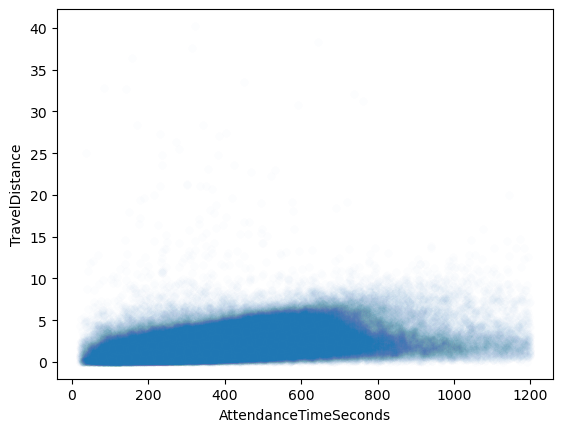

In [4]:
sns.scatterplot(x=cleaned_df['AttendanceTimeSeconds'], y=cleaned_df['TravelDistance'], alpha=0.01);

In [27]:
#df_num = num.sample(frac = 0.1) # small fraction from cleaned data

# Data Pre-processing and Feature Engineering

# Create a copy of the numerical dataset
df_num = num.copy()

# Define columns to drop from the dataset
columns_to_drop = ['TravelSpeed(km/h)', 'Station_Latitude', 'Station_Longitude', 'Incident_Latitude', 'Incident_Longitude', 'AttendanceTimeSeconds']

# Drop the specified columns from the dataset
df_num = df_num.drop(columns_to_drop, axis=1)

# Extract categorical columns from the dataset
cats = df_num.select_dtypes(exclude=np.number).columns.tolist()

# Split the dataset into train and test sets based on the 'CalYear' feature
train = df_num[df_num['CalYear'] < 2022]
test = df_num[df_num['CalYear'] >= 2022]

# Separate target variable and features for training and testing
y_train, X_train = train['AttendanceTimeMinutes'], train.drop(['AttendanceTimeMinutes'], axis=1)
y_test, X_test = test['AttendanceTimeMinutes'], test.drop(['AttendanceTimeMinutes'], axis=1)

# BaseN Encoding for categorical features
for col in cats:
    encoder = ce.BaseNEncoder(base=5)
    data_encoded = encoder.fit_transform(X_train[[col]])  # Ensure it's a dataframe
    X_train = pd.concat([X_train, data_encoded], axis=1)
    X_train.drop(col, axis=1, inplace=True)

    data_encoded_test = encoder.transform(X_test[[col]])  # Ensure it's a dataframe
    X_test = pd.concat([X_test, data_encoded_test], axis=1)
    X_test.drop(col, axis=1, inplace=True)

# Standardize the feature values using StandardScaler
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Print the shapes of the train and test sets after pre-processing
print('train:', X_train.shape)
print('test:', X_test.shape)


train: (529291, 37)
test: (134999, 37)


# PCA nur wenn du Zeit hast :))

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 principal components
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(features)# Perform PCA on the features dataset

# Create a scatter plot to visualize data projected on the 2 PCA axes
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_pca[:, 0], data_pca[:, 1], c = target, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Data projected on 2 PCA axes")
plt.show();

print("The explained variance ratio is", round(pca.explained_variance_ratio_.sum(),2))

# Re-instantiate PCA without specifying the number of components
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio for each principal component
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlim((0,50));

# Plot the cumulative explained variance ratio
plt.figure()
plt.xlim((0,50))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot([0,50], [0.9, 0.9])

In [ ]:
pca = PCA(n_components = 0.9)

X_train_std = pca.fit_transform(X_train_std)
X_test_std = pca.transform(X_test_std)

### decision tree regressor 

In [ ]:
dtr = DecisionTreeRegressor(criterion='absolute_error', max_depth=30)
dtr.fit(X_train_std, y_train)

y_pred_dtr_test = dtr.predict(X_test_std)
y_pred_dtr_train = dtr.predict(X_train_std)

print(f'train score: { dtr.score(X_train_std, y_train)}')  # print score on train data
print(f'test score: {dtr.score(X_test_std, y_test)}') # print score on test data
print(f'train mse: {mean_squared_error(y_pred_dtr_train, y_train)}') # print mse on train data
print(f'test mse: {mean_squared_error(y_pred_dtr_test, y_test)}')
print(f'train mae: {mean_absolute_error(y_pred_dtr_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(y_pred_dtr_test, y_test)}')# print mse on test data

residues_r = y_pred_dtr_test - y_test

fig, axs = plt.subplots(1,3, figsize=(20,10))

sns.scatterplot(x=y_test, y=y_pred_dtr_test, ax=axs[0], color='blue')
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues')

axs[2].bar(X_train.columns, dtr.feature_importances_, color='#980a10')
#axs[5].xlabel('Features')
#axs[5].ylabel('Importance')
axs[2].set_title('Feature Importance')
axs[2].tick_params(labelrotation=90); 

In [ ]:
# nicht ausführen 

In [ ]:
dtr_param = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_dtr = GridSearchCV(estimator=dtr, param_grid = dtr_param)
grid_dtr.fit(X_train_std, y_train)
print(grid_dtr.best_params_)

grid_dtr_pred_train = grid_dtr.predict(X_train_std)
grid_dtr_pred_test = grid_dtr.predict(X_test_std)

print(f'train score: {grid_dtr.score(X_train_std, y_train)}')
print(f'test score: {grid_dtr.score(X_test_std, y_test)}')
print(f'train mse: {mean_squared_error(grid_dtr_pred_train, y_train)}')
print(f'test mse: {mean_squared_error(grid_dtr_pred_test, y_test)}')
print(f'train mae: {mean_absolute_error(y_pred_dtr_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(y_pred_dtr_test, y_test)}')# print mse on test data

print(pd.crosstab(grid_dtr_pred_test, y_test))

### random forest regressor 

train score: 0.9211383485165018
test score: 0.46677003132951256
train mse: 0.3546223353609347
test mse: 2.3021847493499012
train mae: 0.3887837222040937
test mae: 1.046430350415882


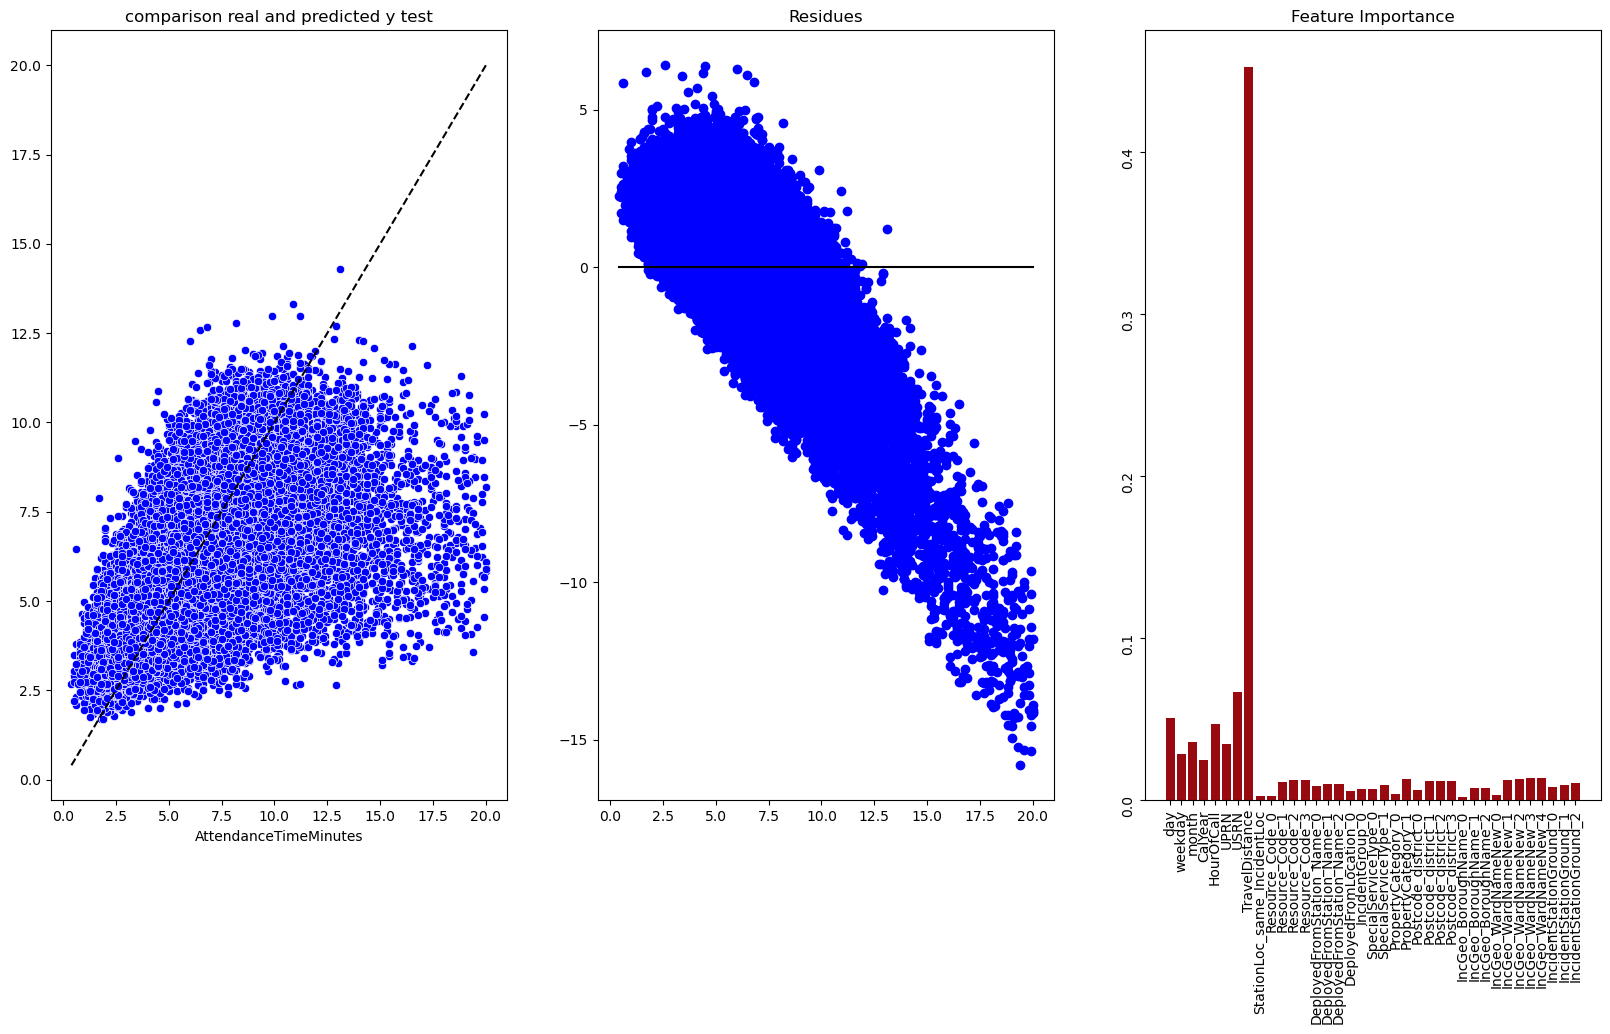

In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train_std, y_train)

y_pred_rfr_test = rfr.predict(X_test_std)
y_pred_rfr_train = rfr.predict(X_train_std)

print(f'train score: { rfr.score(X_train_std, y_train)}')  # print score on train data
print(f'test score: {rfr.score(X_test_std, y_test)}') # print score on test data
print(f'train mse: {mean_squared_error(y_pred_rfr_train, y_train)}') # print mse on train data
print(f'test mse: {mean_squared_error(y_pred_rfr_test, y_test)}') # print mse on test data
print(f'train mae: {mean_absolute_error(y_pred_rfr_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(y_pred_rfr_test, y_test)}') # print mse on test data



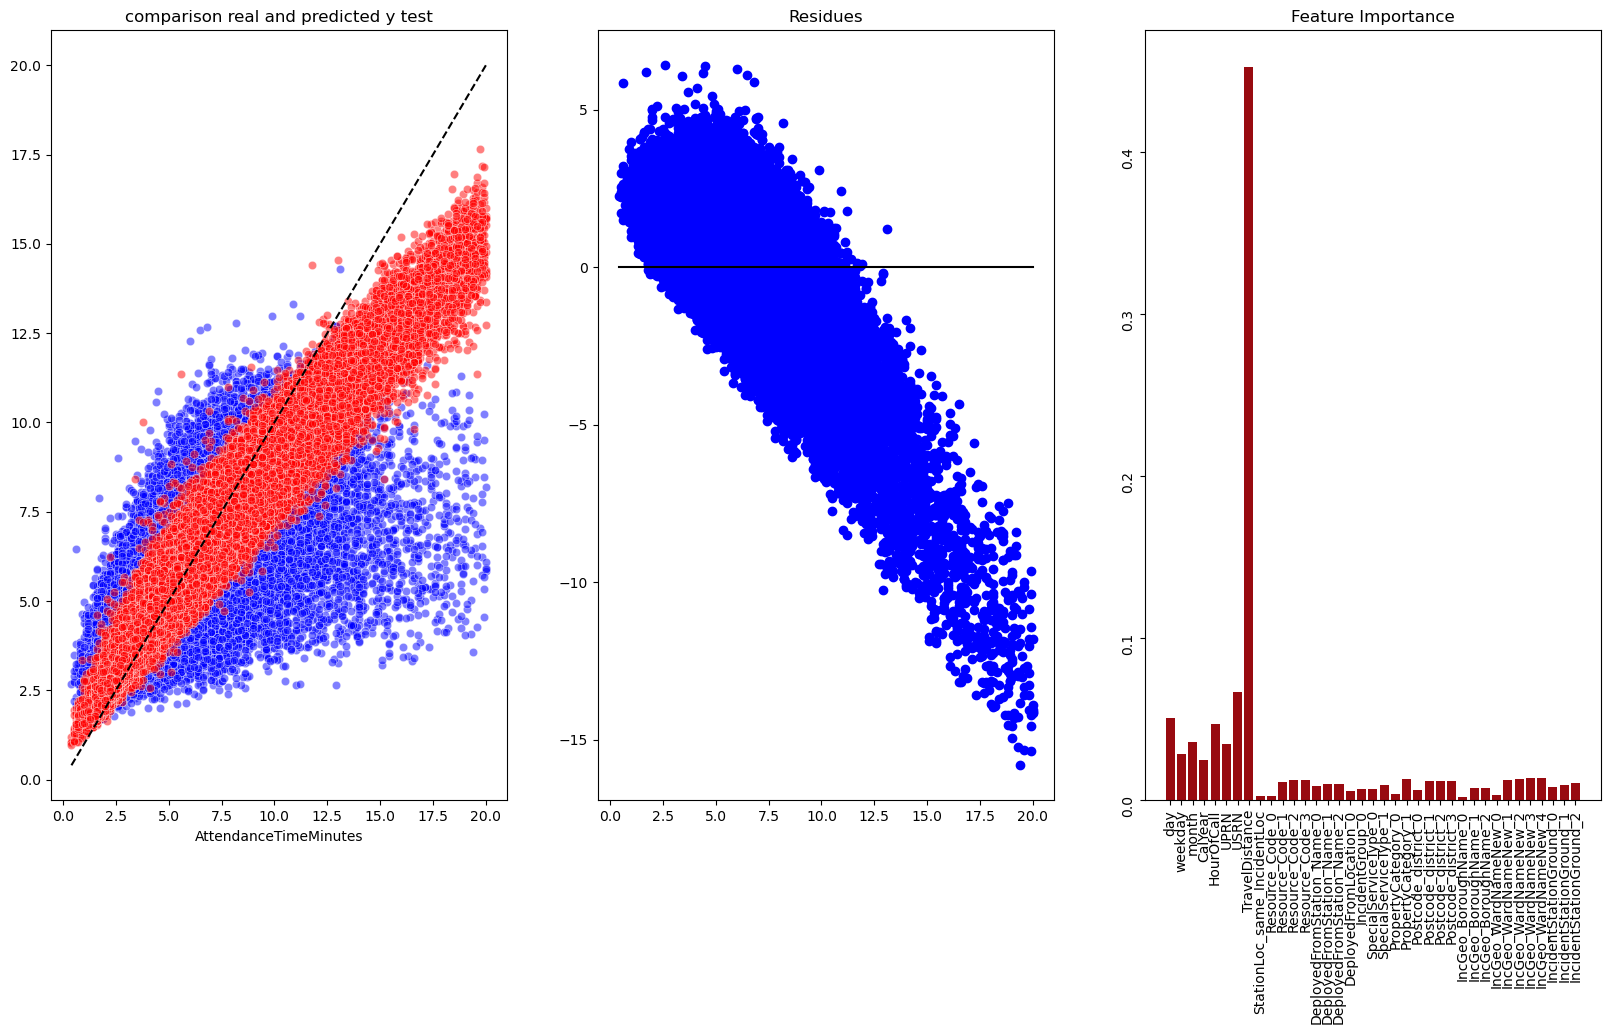

In [31]:
# Residual Analysis and Feature Importance Visualization

# Calculate the residues by subtracting predicted values from actual values for both test and train sets
residues_r = y_pred_rfr_test - y_test

# Create a figure with three subplots
fig, axs = plt.subplots(1,3, figsize=(20,10))

# Subplot 1: Scatter plot of real vs. predicted values for both test and train sets
sns.scatterplot(x=y_test, y=y_pred_rfr_test, ax=axs[0], color='blue', alpha=0.5)
sns.scatterplot(x=y_train, y=y_pred_rfr_train, ax=axs[0], color='red', alpha=0.5)
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

# Subplot 2: Scatter plot of  attendance time vs. residues
axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues')

# Subplot 3: Bar plot of feature importance 
axs[2].bar(X_train.columns, rfr.feature_importances_, color='#980a10')
#axs[5].xlabel('Features')
#axs[5].ylabel('Importance')
axs[2].set_title('Feature Importance')
axs[2].tick_params(labelrotation=90);

### linear regression 

In [32]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
slr = LinearRegression()
slr.fit(X_train_std[['TravelDistance']], y_train)# Fit the model using training data

new = slr.predict(X_train_std[['TravelDistance']]) # predict y_train
new_test = slr.predict(X_test_std[['TravelDistance']])  # predict y_test

print(f'train score: {slr.score(X_train_std[["TravelDistance"]], y_train)}')  # print score on train data
print(f'test score: {slr.score(X_test_std[["TravelDistance"]], y_test)}') # print score on test data
print(f'train mse: {mean_squared_error(new, y_train)}') # print mse on train data
print(f'test mse: {mean_squared_error(new_test, y_test)}') # print mse on test data
print(f'train mae: {mean_absolute_error(new, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(new_test, y_test)}') # print mse on test data

train score: 0.377972549634525
test score: 0.43604290980700544
train mse: 2.7971114344894232
test mse: 2.4348470427632165
train mae: 1.116151438813002
test mae: 1.0702827891561728


Text(0.5, 1.0, 'Residues')

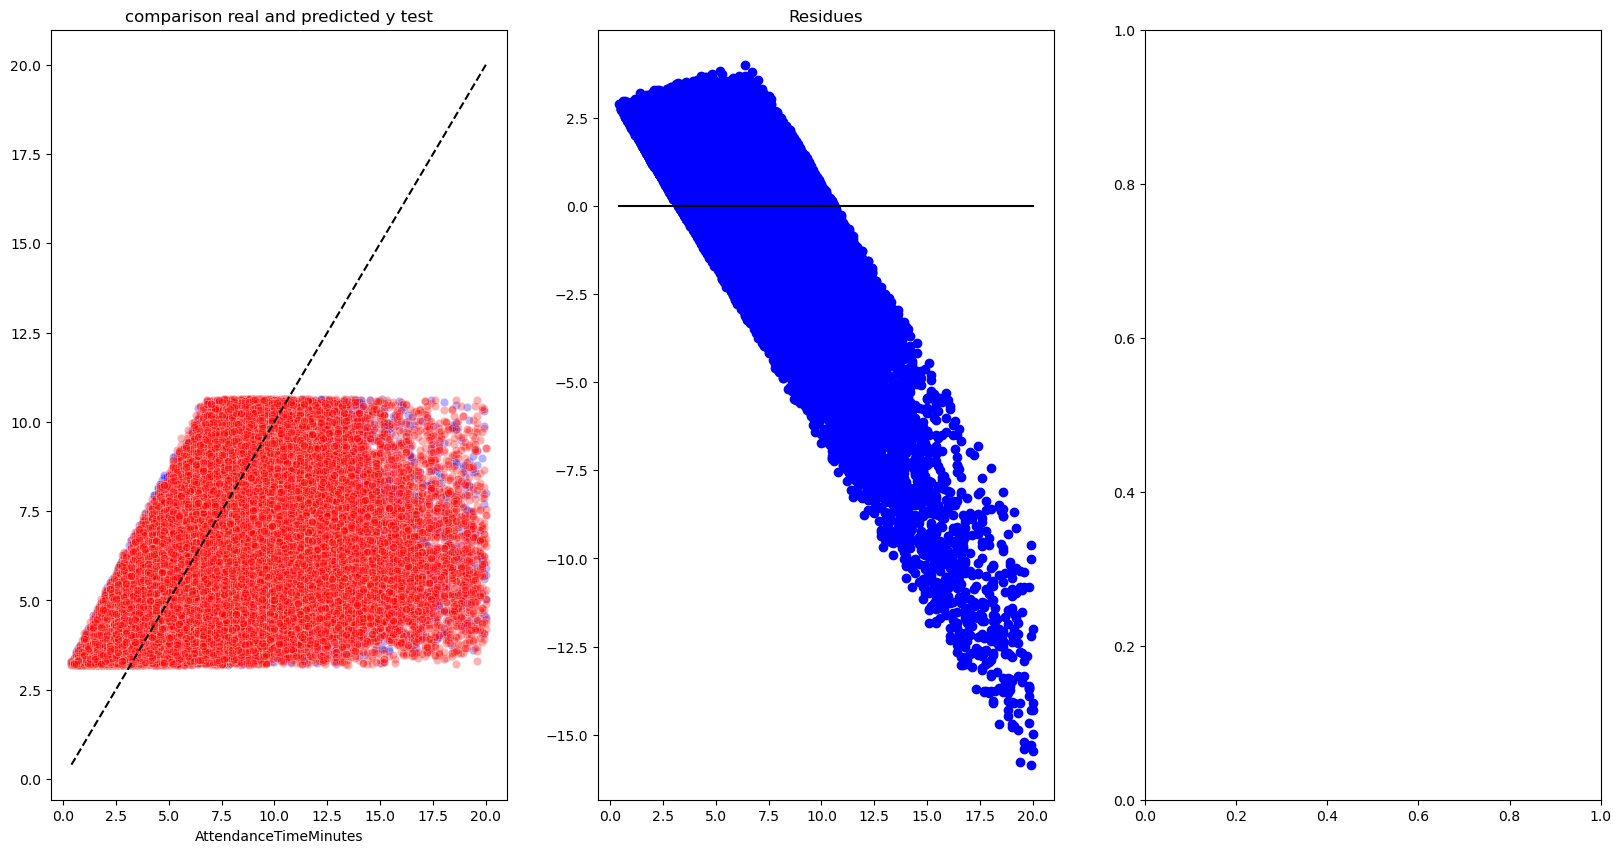

In [33]:
residues_r = new_test - y_test

fig, axs = plt.subplots(1,3, figsize=(20,10))

sns.scatterplot(x=y_test, y=new_test, ax=axs[0], color='blue', alpha=0.3)
sns.scatterplot(x=y_train, y=new, ax=axs[0], color='red', alpha=0.3)
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues');


### logistic regression 

In [15]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
log = LogisticRegression()
# Fit the model on the training data using the 'TravelDistance' feature as the predictor
log.fit(X_train_std[['TravelDistance']], y_train)

# Make predictions on the training and test data using the trained model
log_pred_train = log.predict(X_train_std[['TravelDistance']])
log_pred_test = log.predict(X_test_std[['TravelDistance']])

print(f'train score: {log.score(X_train_std[["TravelDistance"]], y_train)}')  # print score on train data
print(f'test score: {log.score(X_test_std[["TravelDistance"]], y_test)}') # print score on test data
print("train mse:", mean_squared_error(log_pred_train, y_train))
print("test mse:", mean_squared_error(log_pred_test, y_test))
print(f'train mae: {mean_absolute_error(log_pred_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(log_pred_test, y_test)}') # print mse on test data

C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train score: 0.006979147576663877
test score: 0.006807457833020985
train mse: 11720.79879310247
test mse: 10169.483736916569
train mae: 67.19585634367483
test mae: 64.09705997822206


Text(0.5, 1.0, 'Residues')

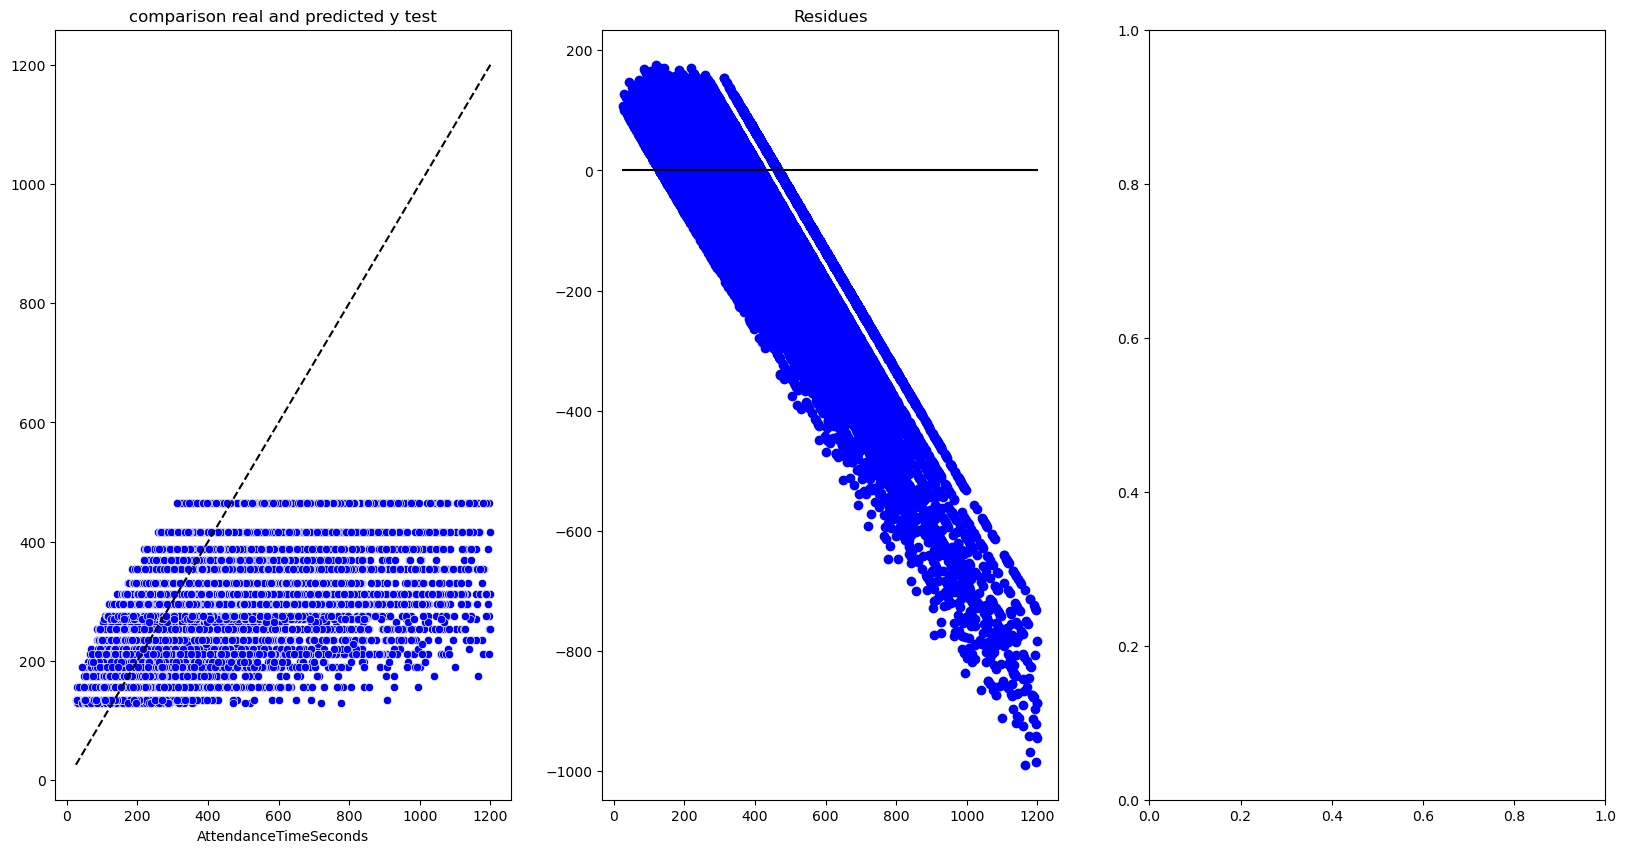

In [16]:
residues_r = log_pred_test - y_test

fig, axs = plt.subplots(1,3, figsize=(20,10))

sns.scatterplot(x=y_test, y=log_pred_test, ax=axs[0], color='blue')
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues')


### ridge

alpha: 81
train score: 0.39564333430444076
test score: 0.44917483919897516
train mse: 2.7176500637290486
test mse: 2.378150815334157
train mae: 1.0925223084706313
test mae: 1.0234541385070084


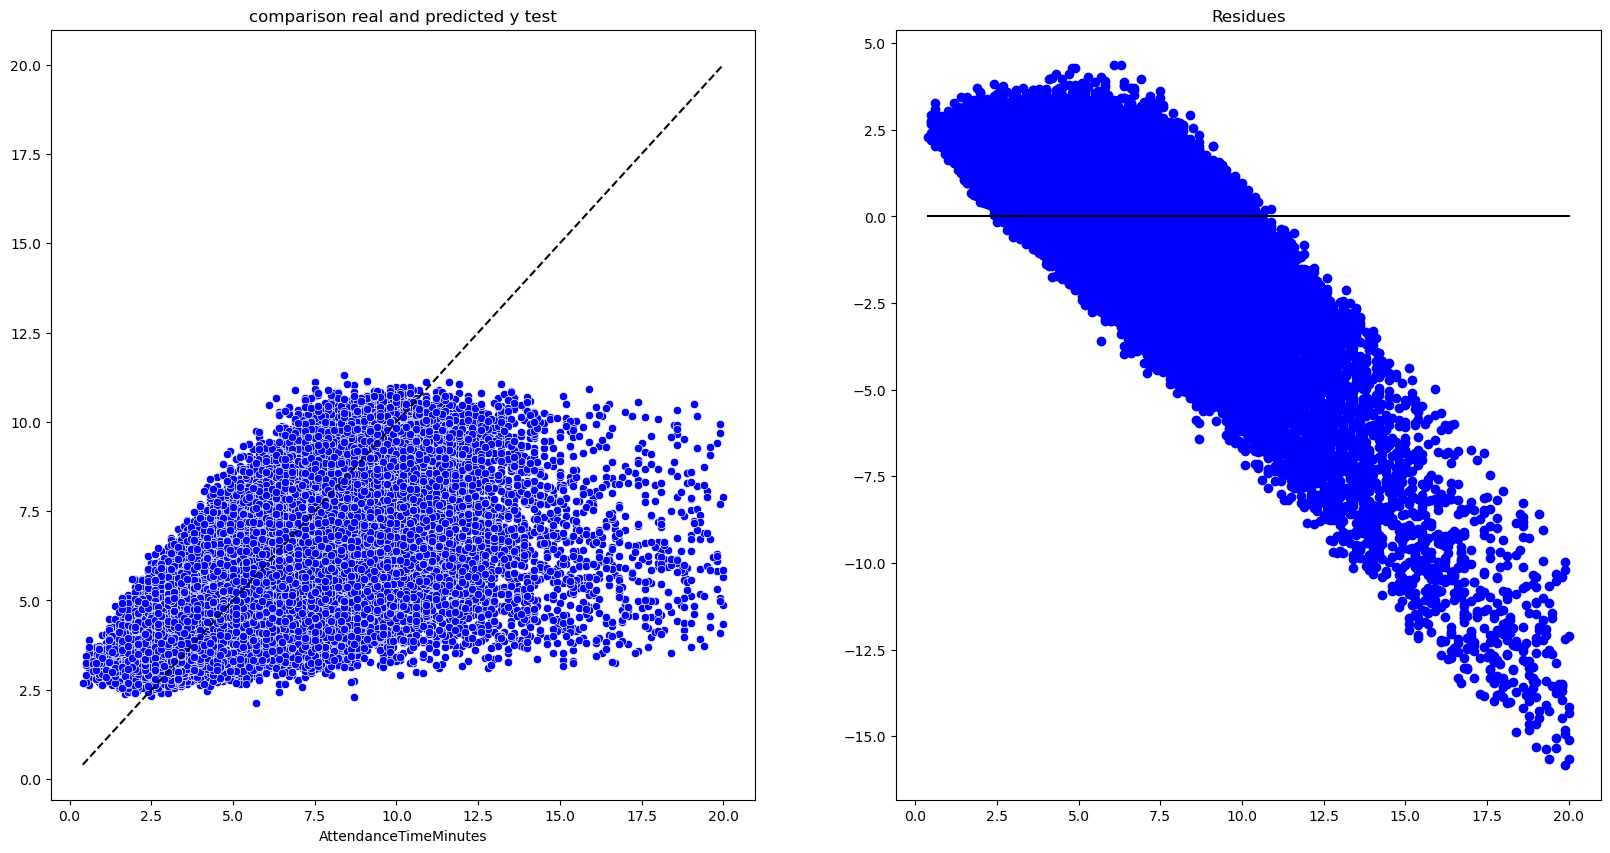

In [34]:
#ridge regression
# ridgecv to find best alpha
ridgecv = RidgeCV(alphas=(range(1,1000))) # initiate ridgecv model
ridgecv.fit(X_train_std, y_train) # train model on training data

ridgecv_pred_train = ridgecv.predict(X_train_std) # predict y_train
ridgecv_pred_test = ridgecv.predict(X_test_std)  # predict y_test

print(f'alpha: {ridgecv.alpha_}') # print best alpha
print(f'train score: {ridgecv.score(X_train_std, y_train)}')  # print score on train data
print(f'test score: {ridgecv.score(X_test_std, y_test)}') # print score on test data
print(f'train mse: {mean_squared_error(ridgecv_pred_train, y_train)}') # print mse on train data
print(f'test mse: {mean_squared_error(ridgecv_pred_test, y_test)}') # print mse on test data
print(f'train mae: {mean_absolute_error(ridgecv_pred_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(ridgecv_pred_test, y_test)}') # print mse on test data

residues_r = ridgecv_pred_test - y_test

fig, axs = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(x=y_test, y=ridgecv_pred_test, ax=axs[0], color='blue')
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues');

### lasso

In [18]:
lassocv = LassoCV(alphas=(range(1,1000))) # initiate ridgecv mode
lassocv.fit(X_train_std, y_train) # train model on training data

lasso_pred_train = lassocv.predict(X_train_std)  # predict y_train
lasso_pred_test = lassocv.predict(X_test_std)  # predict y_test

print(f'alpha: {lassocv.alpha_}') # print best alpha
print(f'train score: {lassocv.score(X_train_std, y_train)}')  # print score on train data
print(f'test score: {lassocv.score(X_test_std, y_test)}') # print score on test data
print(f'train mse: {mean_squared_error(lasso_pred_train, y_train)}') # print mse on train data
print(f'test mse: {mean_squared_error(lasso_pred_test, y_test)}') # print mse on test data
print(f'train mae: {mean_absolute_error(lasso_pred_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(lasso_pred_test, y_test)}') # print mse on test data

alpha: 1
train score: 0.3938003121278243
test score: 0.44969305248294267
train mse: 9811.584693574881
test mse: 8551.05705472592
train mae: 65.68148654469613
test mae: 61.32594867420407


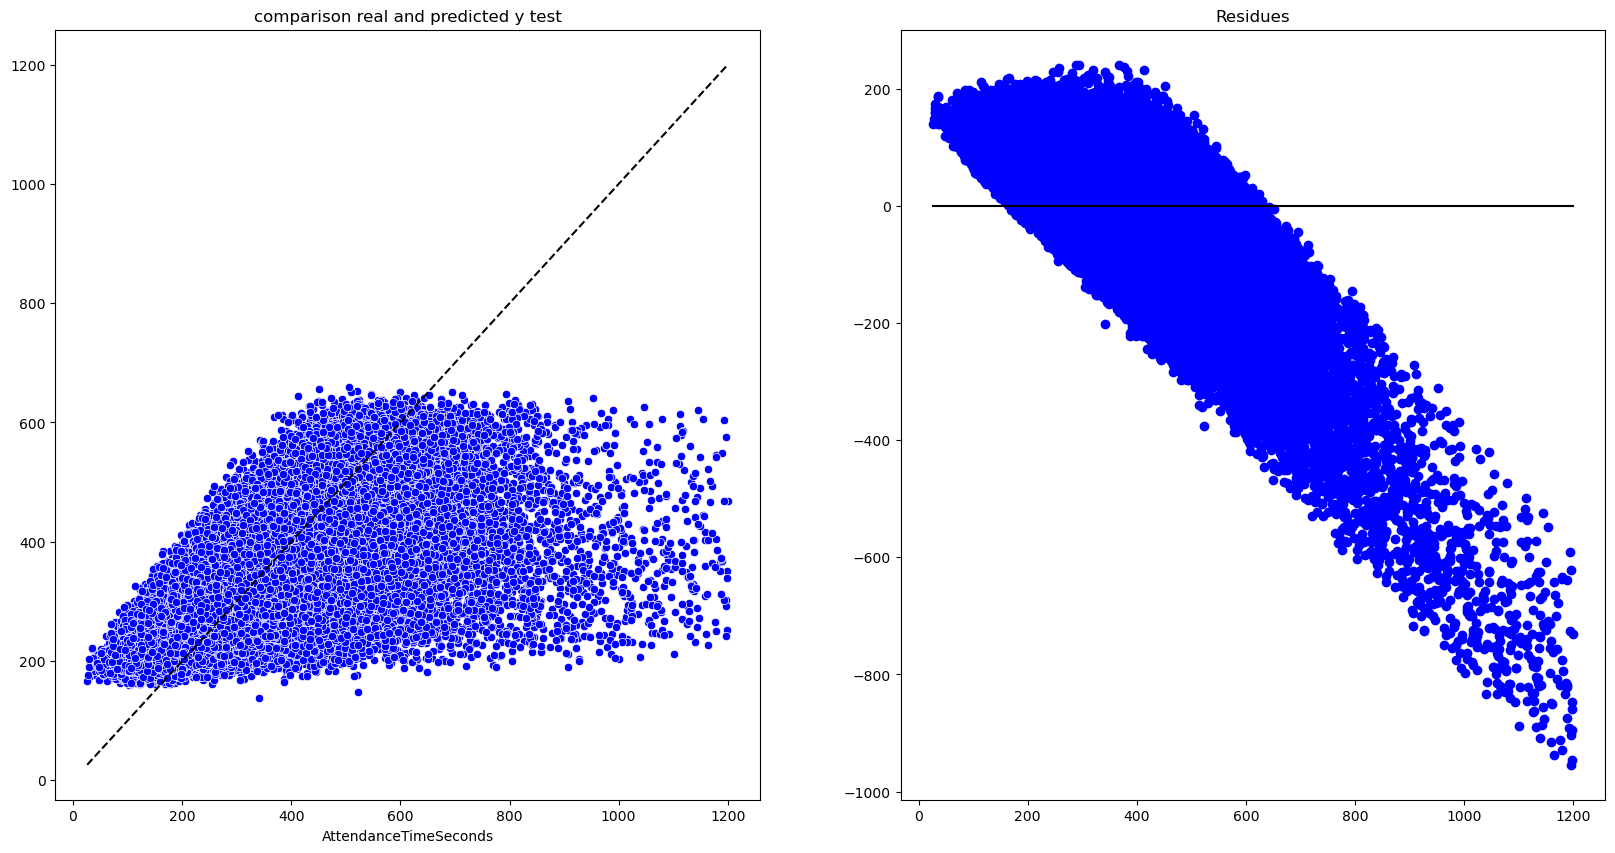

In [19]:
residues_r = lasso_pred_test - y_test

fig, axs = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(x=y_test, y=lasso_pred_test, ax=axs[0], color='blue')
#axs[0].xlabel('real')
#axs[0].ylabel('predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('comparison real and predicted y test');

axs[1].scatter(y_test, residues_r, color="blue")
axs[1].plot((y_test.min(), y_test.max()),(0,0), color="k")
#axs[1].xlabel("y_train")
#axs[1].ylabel("residues")
axs[1].set_title('Residues');

### elastic net 

In [20]:
# Elastic Net Regression with Cross-Validation

# Import the ElasticNetCV module and set the cross-validation value 
elastic = ElasticNetCV(cv=15, l1_ratio=(0.1, 1, 100, 1000), alphas=(0.1, 10, 100, 500, 1000))

# Fit the ElasticNet model to the standardized training data and target variable
elastic.fit(X_train_std, y_train)

# Make predictions on the training data using the trained ElasticNet model
elastic_pred_train = elastic.predict(X_train_std)

# Make predictions on the test data using the trained ElasticNet model
elastic_pred_test = elastic.predict(X_test_std)

print(f'train score: {elastic.score(X_train_std, y_train)}')  # print score on train data
print(f'test score: {elastic.score(X_test_std, y_test)}') # print score on test data
print("train mse:", mean_squared_error(elastic_pred_train, y_train))
print("test mse:", mean_squared_error(elastic_pred_test, y_test))
print(f'train mae: {mean_absolute_error(elastic_pred_train, y_train)}') # print mse on train data
print(f'test mae: {mean_absolute_error(elastic_pred_test, y_test)}') # print mse on test data

C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89607686.83973694, tolerance: 797072.5536988778
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88993723.928792, tolerance: 792416.588512793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89572108.35109901, tolerance: 794661.0432476199
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: Conve

train score: 0.39566366548702736
test score: 0.4495652156718435
train mse: 9781.425573298771
test mse: 8553.043473160822
train mae: 65.53549986045074
test mae: 61.336606333276755


**DATA SPLITTING and VARIANCE THRESHOLD AND NORMALIZATION****

In [ ]:
cleaned_df['AttendanceTimeMin'] =round(cleaned_df['AttendanceTimeSeconds'] / 60)

data_knnreg = cleaned_df.drop(['AttendanceTimeSeconds','AttendanceTimeMin'], axis =1)
target_knnreg = cleaned_df['AttendanceTimeMin']

X_train, X_test, y_train, y_test = train_test_split(data_knnreg, target_knnreg, test_size=0.2, random_state=42)

# Variance threshold
selector = VarianceThreshold(threshold=1e-04)  

# Apply variance threshold on the train dataset
X_train = selector.fit_transform(X_train)

# Apply variance threshold on the test dataset
X_test = selector.transform(X_test)

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train= scaler.fit_transform(X_train)

# Transform your test data using the fitted scaler
X_test= scaler.transform(X_test)

**KNEIGHBORS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# PCA
pca = PCA(n_components=10)  

# Apply PCA on the train dataset
X_train = pca.fit_transform(X_train)

# Apply PCA on the test dataset
X_test = pca.transform(X_test)

# Create KNN regressor
knn_regressor = KNeighborsRegressor()

# Train the regressor on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("KNN Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))# Calculate Mean Squared Error (MSE)


print("KNN Regression Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))# Calculate Root Mean Squared Error (RMSE)


print("KNN Regression Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))# Calculate Mean Absolute Error (MAE)


print("KNN Regression R-squared (coefficient of determination):", r2_score(y_test, y_pred))# Calculate R-squared (coefficient of determination)


**HYPERPARAMETER TUNING**

In [ ]:
# Create KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the hyperparameter space for grid search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate on the test set
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best KNN Regression Mean Squared Error (MSE) on Test Set:", mse)
print("Best KNN Regression Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))# Calculate Root Mean Squared Error (RMSE)


print("KNN Regression Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))# Calculate Mean Absolute Error (MAE)


print("KNN Regression R-squared (coefficient of determination):", r2_score(y_test, y_pred))

**PLOTTING KNN Regression Cross-Validation Results**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Get the cross-validation results from the grid search
cv_results = grid_search.cv_results_

# Create a data frame to hold the cross-validation results
cv_df = pd.DataFrame(cv_results)

# Extract the performance scores for each combination of hyperparameters
cv_scores = cv_df.pivot_table(index='param_n_neighbors', columns='param_weights', values='mean_test_score')

# Plot a heatmap to visualize the cross-validation results
plt.figure(figsize=(8, 6))
sns.heatmap(cv_scores, annot=True, cmap='coolwarm', fmt='.3f', cbar=True)
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.title('KNN Regression Cross-Validation Results')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the performance metrics for different hyperparameter values using scatter plots
n_neighbors_values = param_grid['n_neighbors']
uniform_mse = [grid_search.cv_results_['mean_test_score'][i] for i in range(0, len(n_neighbors_values) * 2, 2)]
distance_mse = [grid_search.cv_results_['mean_test_score'][i] for i in range(1, len(n_neighbors_values) * 2, 2)]



# Scatter plot for the predicted values vs. true target values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: True Values vs. Predicted Values')
plt.tight_layout()
plt.show()


**SGDREGRESSOR**

In [ ]:
data_svmreg = cleaned_df.drop(['AttendanceTimeSeconds','AttendanceTimeMin'], axis =1)
target_svmreg = cleaned_df['AttendanceTimeMin']

X_train, X_test, y_train, y_test = train_test_split(data_svmreg, target_svmreg, test_size=0.2, random_state=42)

# Variance threshold
selector = VarianceThreshold(threshold=1e-04)  

# Apply variance threshold on the train dataset
X_train = selector.fit_transform(X_train)

# Apply variance threshold on the test dataset
X_test = selector.transform(X_test)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Normalize the original training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import Nystroem

# Create the Nystroem kernel approximation with the appropriate parameters
nystroem_approximation = Nystroem(kernel='rbf', n_components=100, random_state=42)

# Apply Nystroem approximation to the training data
X_train_nystroem = nystroem_approximation.fit_transform(X_train)

# Apply Nystroem approximation to the test data
X_test_nystroem = nystroem_approximation.transform(X_test)

# Create the SGDRegressor with the appropriate parameters
sgd_regressor = SGDRegressor(loss='squared_error', alpha=0.0001, random_state=42)

# Fit the SGDRegressor model on the training data
sgd_regressor.fit(X_train_nystroem, y_train)
y_pred_train = sgd_regressor.predict(X_train_nystroem)

# Calculate Mean Squared Error (MSE) for evaluation
 
print("SGDRegressor train Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
print("SGDRegressor train Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_pred_train)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor train Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor train R-squared (coefficient of determination):", r2_score(y_train, y_pred_train))
print('\n\n\n------------------')
# Make predictions on the test data
y_pred = sgd_regressor.predict(X_test_nystroem)

# Calculate Mean Squared Error (MSE) for evaluation
 
print("SGDRegressor tesy Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("SGDRegressor test Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor test  Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor test R-squared (coefficient of determination):", r2_score(y_test, y_pred))

**PERMUTATION TEST - STATISTICAL TEST**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Concatenate actual target values and predicted values
actual_and_predicted = np.concatenate([y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)

# Calculate the observed R-squared value
observed_r2 = r2_score(y_test, y_pred)

# Number of permutations
num_permutations = 1000

# Create an array to store permuted R-squared values
permuted_r2_values = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Shuffle the predicted values
    np.random.shuffle(actual_and_predicted[:, 1])
    # Calculate R-squared with shuffled values
    permuted_r2 = r2_score(actual_and_predicted[:, 0], actual_and_predicted[:, 1])
    # Store the permuted R-squared value
    permuted_r2_values[i] = permuted_r2

# Calculate the p-value
p_value = (np.sum(permuted_r2_values >= observed_r2) + 1) / (num_permutations + 1)

print("Observed R-squared:", observed_r2)
print("p-value:", p_value)

#the p-value is small (e.g., less than 0.05), it indicates that the observed R-squared value is significantly different from what would be expected by chance,
#suggesting that the model's performance is statistically significant

**RANDOMIZEDSEARCHCV**

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'alpha': stats.loguniform(1e-6, 1e-2),
    'penalty': ['l1', 'l2'],
    'max_iter': stats.randint(100, 5000),
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(sgd_regressor, param_distributions=param_dist, n_iter=10, cv=4, random_state=42)
random_search.fit(X_train_nystroem, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_svm = random_search.best_estimator_

# Predict the target variable for the approximated test data
y_pred_test = best_svm.predict(X_test_nystroem)
y_pred_traincv = best_svm.predict(X_train_nystroem)

print("SGDRegressor Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_test))
print("SGDRegressor Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_test)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_test))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor R-squared (coefficient of determination):", r2_score(y_test, y_pred_test))

print('\n\n--------------')
print("SGDRegressor train Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_traincv))
print("SGDRegressor train Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_pred_traincv)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor train Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_traincv))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor train R-squared (coefficient of determination):", r2_score(y_train, y_pred_traincv))

In [ ]:
**BAGGING**

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(base_estimator=sgd_regressor, n_estimators=10, random_state=42)
bagging_regressor.fit(X_train_nystroem, y_train)
y_pred_testbag = bagging_regressor.predict(X_test_nystroem)

y_pred_trainbag = bagging_regressor.predict(X_train_nystroem)

print("SGDRegressor Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_testbag))
print("SGDRegressor Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_testbag)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_testbag))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor R-squared (coefficient of determination):", r2_score(y_test, y_pred_testbag))

print('\n\n--------------')
print("SGDRegressor train Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_trainbag))
print("SGDRegressor train Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_pred_trainbag)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor train Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_trainbag))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor train R-squared (coefficient of determination):", r2_score(y_train, y_pred_trainbag))

**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_regressor = GradientBoostingRegressor(loss='squared_error', n_estimators=100, random_state=42)
boosting_regressor.fit(X_train_nystroem, y_train)
y_pred_testboo = boosting_regressor.predict(X_test_nystroem)
y_pred_trainboo = bagging_regressor.predict(X_train_nystroem)

print("SGDRegressor Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_testboo))
print("SGDRegressor Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_testboo)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_testboo))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor R-squared (coefficient of determination):", r2_score(y_test, y_pred_testboo))

print('\n\n--------------')
print("SGDRegressor train Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_trainboo))
print("SGDRegressor train Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_pred_trainboo)))# Calculate Root Mean Squared Error (RMSE)


print("SGDRegressor train Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_trainboo))# Calculate Mean Absolute Error (MAE)


print("SGDRegressor train R-squared (coefficient of determination):", r2_score(y_train, y_pred_trainboo))
